# Audio preprocessing

- File format? m4a to wav?
- set mono
- normalize
- bandpass filter
- resample? do we want it consistent between files?
- cut into shorter parts?

In [27]:
from scipy.io.wavfile import read as readwav, write as writewav
from tools import *
import os
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import tools
from importlib import reload


reload(tools)


plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5

In [28]:
folder = "wav_examples"

files = os.listdir(folder)
for i, f in enumerate(files):
    print(i, f)

0 Alphabet.wav
1 andreas_proc.wav
2 digitala_resurser_sv.wav
3 digitala_trash1.Wav
4 digitala_trash2.Wav
5 digitala_vowels_manual_timestamps.csv
6 female_canoe-vowels.wav
7 female_canoe.wav
8 female_turtles.wav
9 kaviar_sv.wav
10 roy.wav
11 sammarbete_sv.wav
12 svenska_combo.wav


In [29]:
audio_path = os.path.join(folder, files[3])
Fs, x_original = readwav(audio_path)

x_pp = preprocess(audio_path, bpfilt=(20, 20000))

preprocessing digitala_trash1


In [30]:
x_original.shape

(330750, 2)

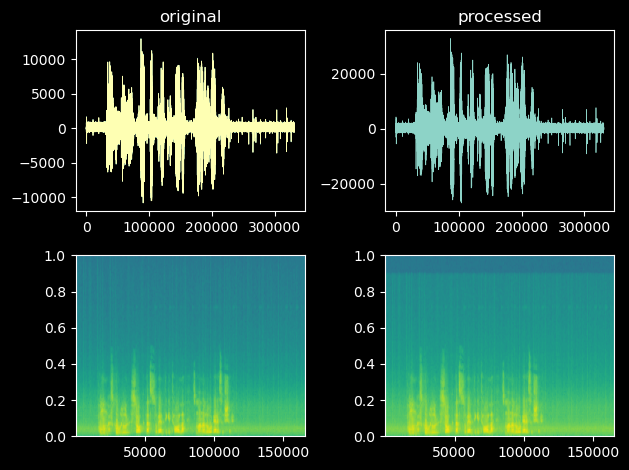

In [31]:
plt.figure()

# signals
plt.subplot(221)
plt.plot(x_original)
plt.title("original")
plt.subplot(222)
plt.plot(x_pp)
plt.title("processed")

# spectrograms
plt.subplot(223)
plt.specgram(x_original[:, 0])
plt.subplot(224)
plt.specgram(x_pp)

plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (330750, 2)

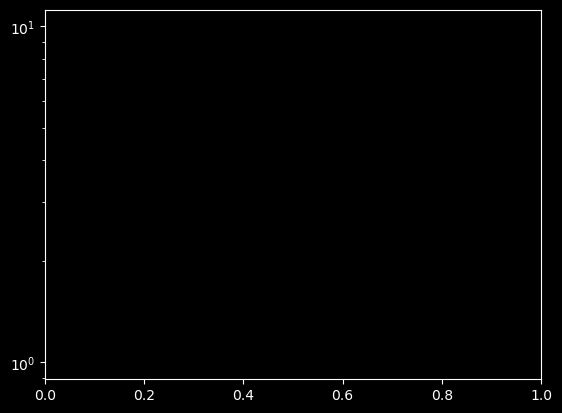

In [32]:
ff_original, P_original = signal.periodogram(x_original, Fs)
ff_pp, P_pp = signal.periodogram(x_pp, Fs)

plt.figure()
plt.semilogy(ff_original, P_original)
plt.semilogy(ff_pp, P_pp)
plt.legend(("original", "processed"))
plt.ylim(1e-10, 1e5)
plt.show()

## Filter example

In [ ]:
Fs = 40000

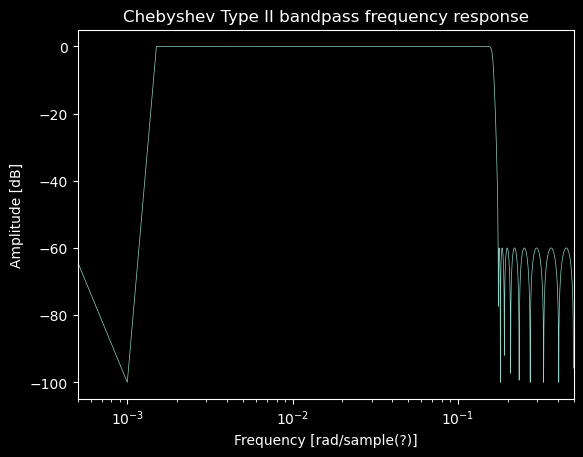

In [ ]:
fmin, fmax = 100, 14000
sos = signal.iirfilter(
    17,
    [2 * fmin / Fs, 2 * fmax / Fs],
    rs=60,
    btype="band",
    analog=False,
    ftype="cheby2",
    output="sos",
)
w, h = signal.sosfreqz(sos, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2 * np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title("Chebyshev Type II bandpass frequency response")
ax.set_xlabel("Frequency [rad/sample(?)]")
ax.set_ylabel("Amplitude [dB]")
plt.xlim(20 / Fs, 20000 / Fs)
plt.show()